In [15]:
import pandas as pd
import openpyxl
import os
import glob
from pathlib import Path

In [16]:
df_centralised = pd.read_csv('df_centralised_cleaned.csv')
df_centralised_sentinel = pd.read_csv("df_centralised_sentinel_cleaned2.csv")

In [17]:
df_centralised.shape, df_centralised_sentinel.shape

((110187, 84), (37045, 84))

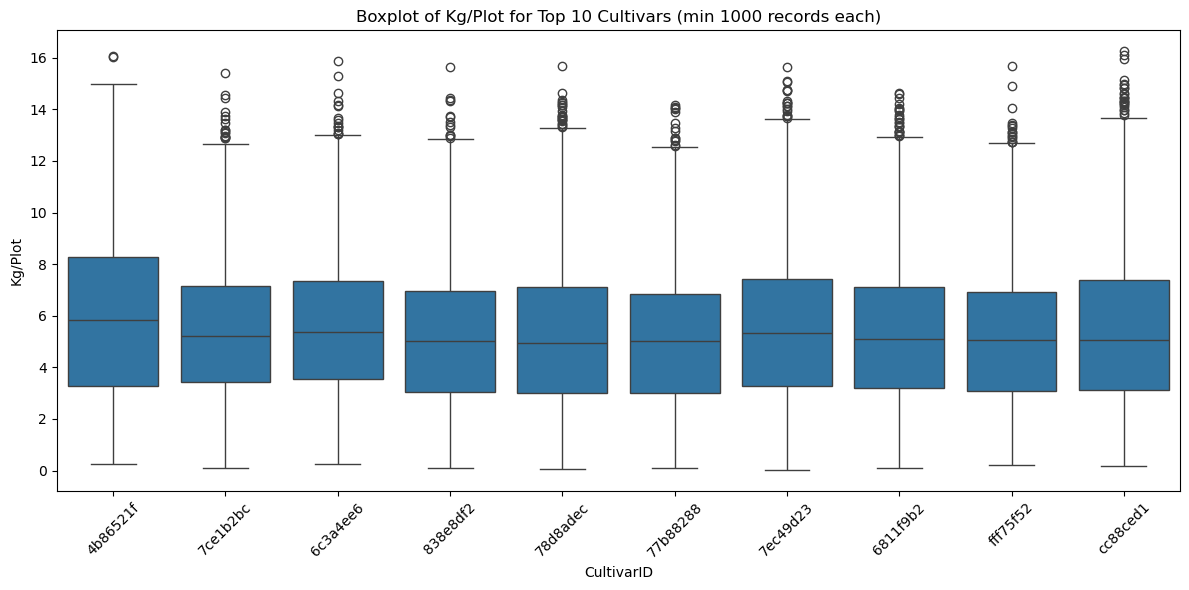

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_data.csv")

# Step 1: Filter out cultivars with fewer than 10 records
cultivar_counts = df_centralised['CultivarID'].value_counts()
valid_cultivars = cultivar_counts[cultivar_counts >= 1000].index
df_filtered = df_centralised[df_centralised['CultivarID'].isin(valid_cultivars)]

# Step 2: Compute mean Kg/Plot per cultivar, get top 10
top10_cultivars = (
    df_filtered.groupby('CultivarID')['Kg/Plot']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 3: Keep only top 10 cultivars
df_top10 = df_filtered[df_filtered['CultivarID'].isin(top10_cultivars)]

# Step 4: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='CultivarID', y='Kg/Plot')
plt.title('Boxplot of Kg/Plot for Top 10 Cultivars (min 1000 records each)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


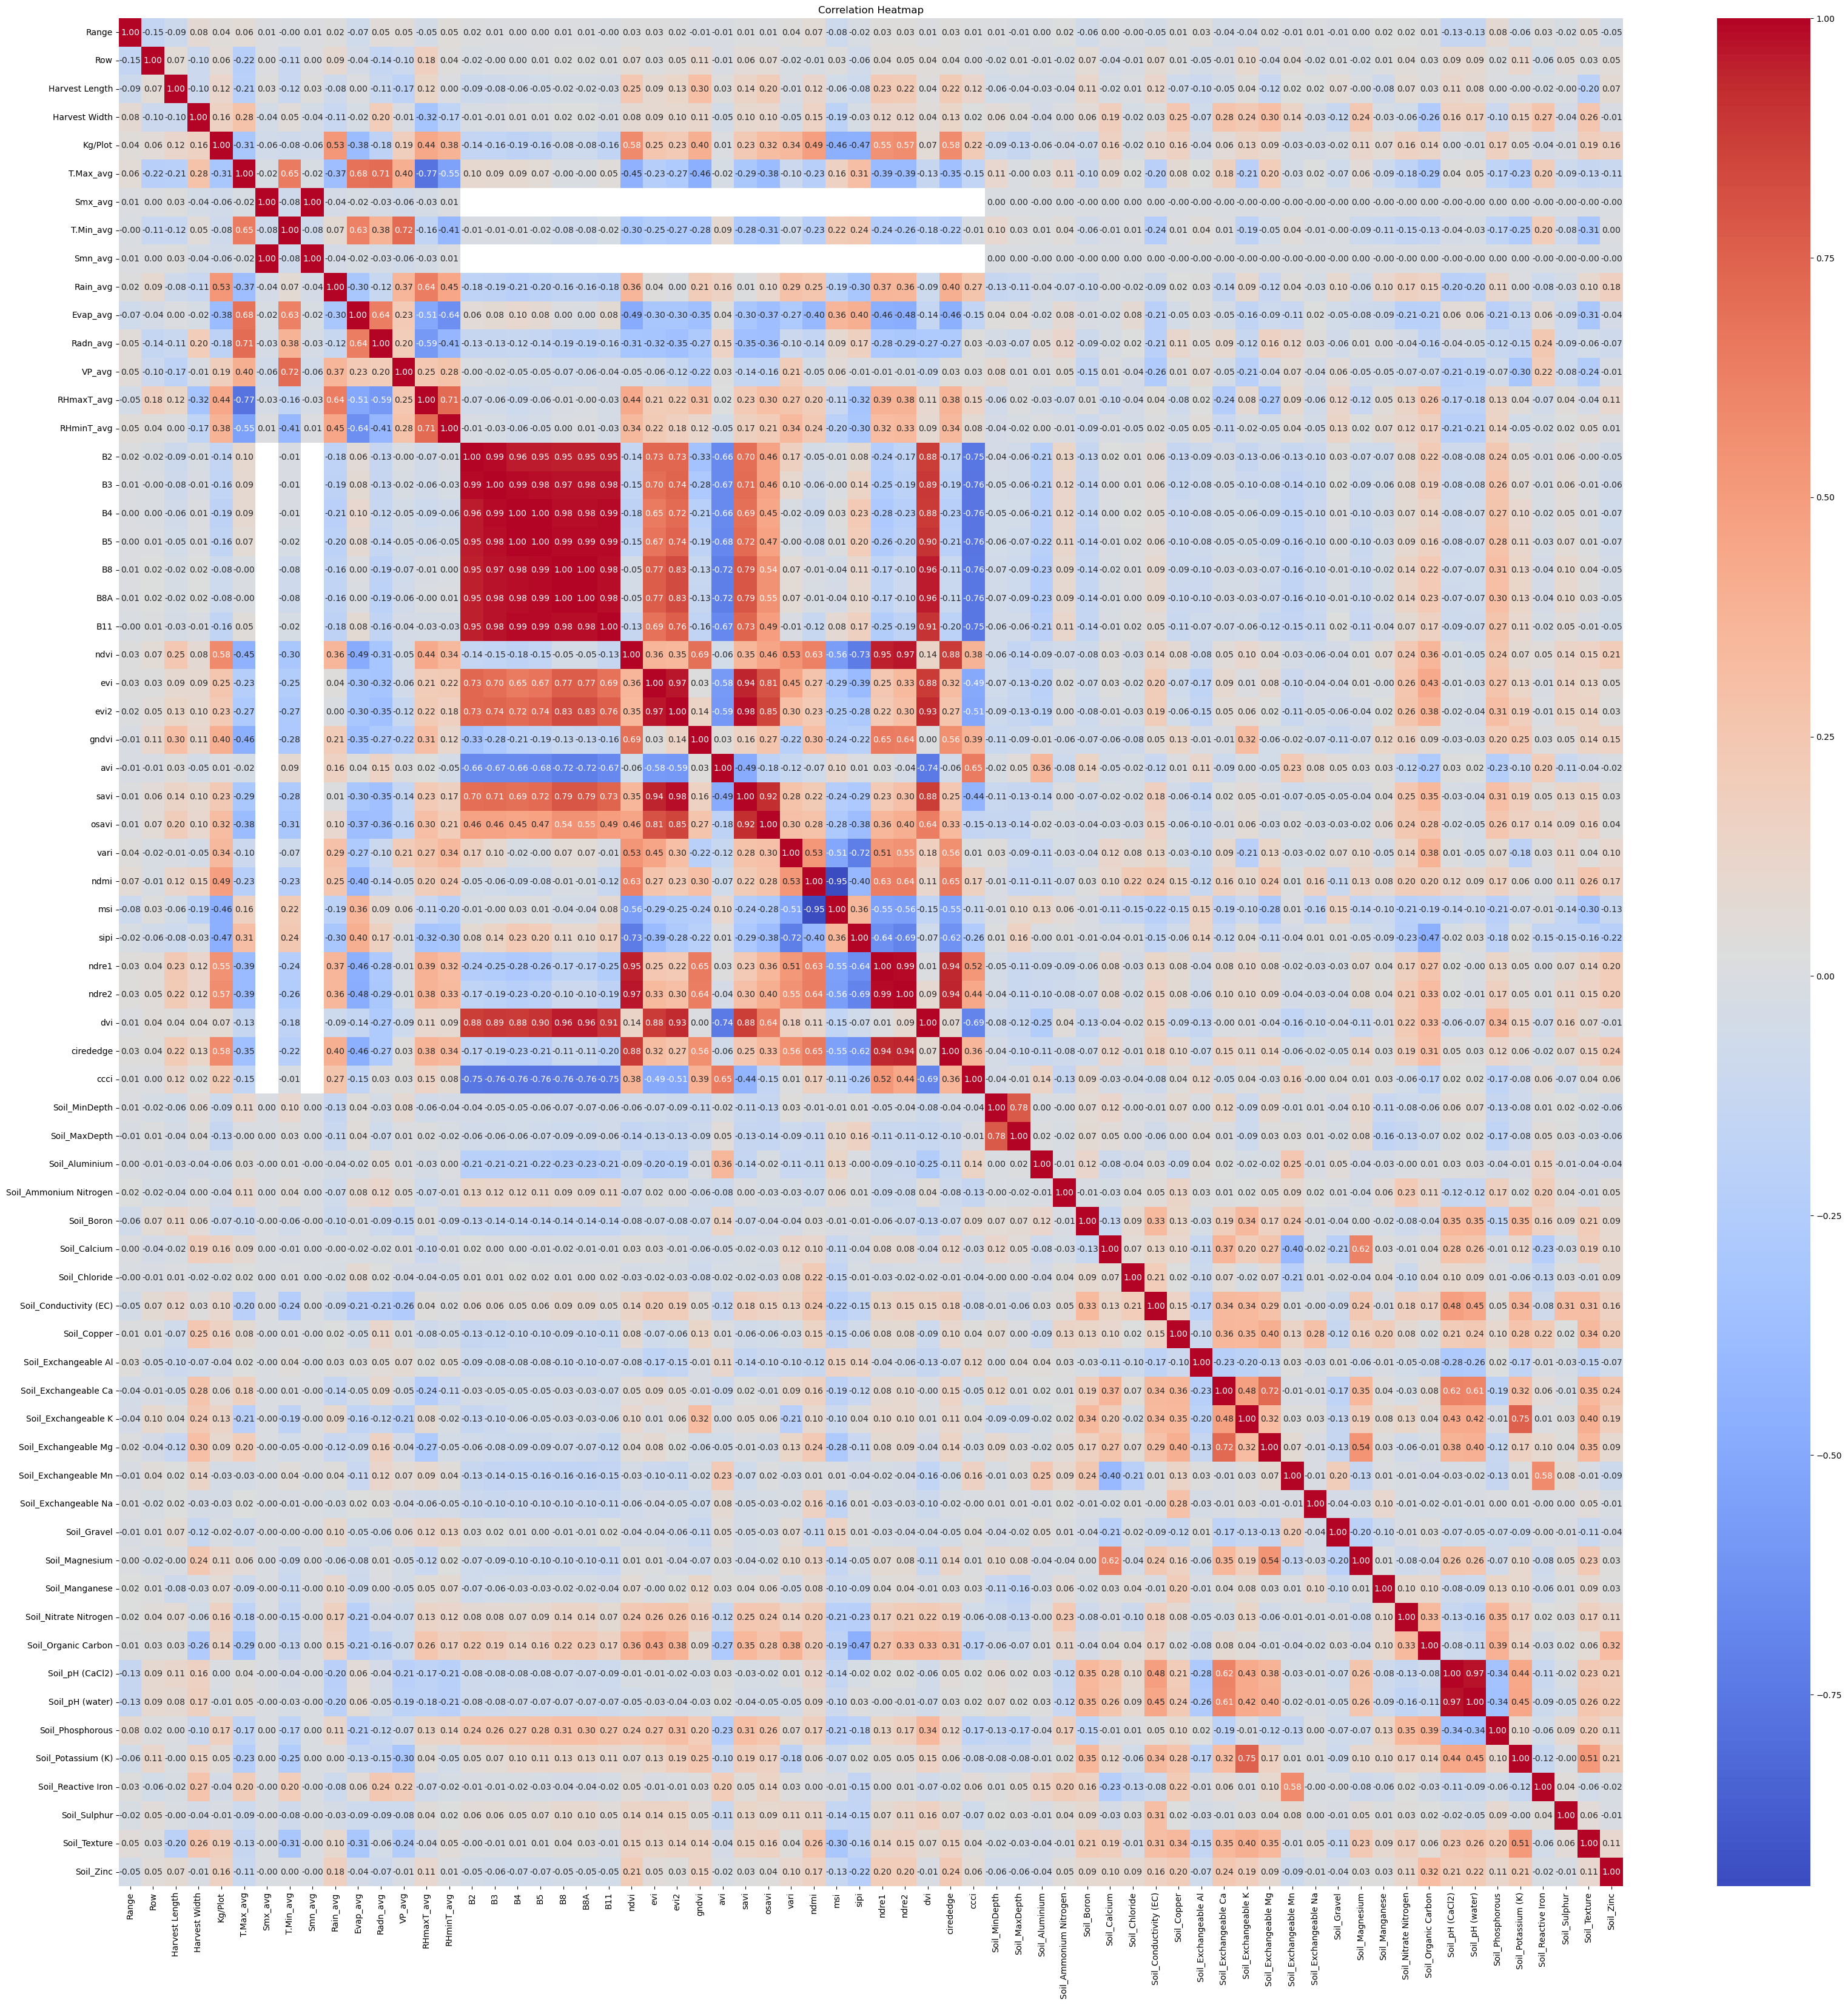

In [19]:
#do correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df_centralised.select_dtypes(include=['float64', 'int64'])

numeric_df.drop(columns=['Soil_Released', 'Soil_Year', 'Srn_avg','Sev_avg', 'Ssl_avg', 'Svp_avg', 'Year', 'Soil_SoilTestID'], inplace=True)
#part1 = numeric_df.iloc[:, :int(numeric_df.shape[1] / 2)]
part2 = numeric_df.iloc[:, int(numeric_df.shape[0] / 2):]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
#correlation_matrix = part1.corr()

# Plot the heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
from sklearn.impute import KNNImputer

# KNN imputation
sentinel_col = ['B2', 'B3', 'B4', 'B5', 'B8', 'B8A', 'B11', 'ndvi', 'evi', 'evi2',
       'gndvi', 'avi', 'savi', 'osavi', 'vari', 'ndmi', 'msi', 'sipi', 'ndre1',
       'ndre2', 'dvi', 'cirededge', 'ccci']

imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_centralised_sentinel_imputed = df_centralised.copy()
df_centralised_sentinel_imputed[sentinel_col] = imputer.fit_transform(df_centralised[sentinel_col])

In [21]:
df_centralised_sentinel_imputed['TrialCode'] = df_centralised_sentinel_imputed['TrialCode'].fillna('Missing')

In [22]:
df_centralised_sentinel_imputed.to_csv("df_centralised_sentinel_imputed_cleaned.csv", index=False)
df_centralised_sentinel_imputed.to_parquet("df_centralised_sentinel_imputed_cleaned.parquet", index=False)